In [1]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = -1

In [3]:
data = pd.read_csv("telecom_churn_data.csv")

In [4]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
data.shape

(99999, 226)

In [6]:
data[data.columns[data.columns.str.contains("date")]]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,08-08-2014,9/28/2014,6/21/2014,7/16/2014,08-08-2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,08-10-2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,08-09-2014,9/28/2014,06-04-2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,06-03-2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,09-02-2014,6/13/2014,NaN,NaN,NaN
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [7]:
for i in data.columns[data.columns.str.contains("date")]:
    data[i] = pd.to_datetime(data[i])

## Dropping the cloumns with just one unique value.

In [8]:
data = data.loc[:,data.nunique()>1]

In [9]:
(data.isnull().mean()*100).sort_values(ascending = False).round(3).astype(str)+"%"

night_pck_user_6            74.847%
arpu_2g_6                   74.847%
count_rech_3g_6             74.847%
av_rech_amt_data_6          74.847%
count_rech_2g_6             74.847%
max_rech_data_6             74.847%
fb_user_6                   74.847%
date_of_last_rech_data_6    74.847%
total_rech_data_6           74.847%
arpu_3g_6                   74.847%
night_pck_user_7            74.429%
arpu_2g_7                   74.429%
total_rech_data_7           74.429%
arpu_3g_7                   74.429%
max_rech_data_7             74.429%
av_rech_amt_data_7          74.429%
count_rech_3g_7             74.429%
date_of_last_rech_data_7    74.429%
count_rech_2g_7             74.429%
fb_user_7                   74.429%
date_of_last_rech_data_9    74.078%
arpu_2g_9                   74.078%
max_rech_data_9             74.078%
count_rech_3g_9             74.078%
fb_user_9                   74.078%
av_rech_amt_data_9          74.078%
total_rech_data_9           74.078%
arpu_3g_9                   

## High missing values in month of June

In [10]:
columns_with_high_missing_value = data.columns[(data.isnull().mean()>.70)]
columns_with_high_missing_value_june = columns_with_high_missing_value[columns_with_high_missing_value.str.contains("6")]
columns_with_high_missing_value_june

Index(['date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6',
       'arpu_2g_6', 'night_pck_user_6', 'fb_user_6'],
      dtype='object')

In [11]:
data[columns_with_high_missing_value_june].isnull().sum()

date_of_last_rech_data_6    74846
total_rech_data_6           74846
max_rech_data_6             74846
count_rech_2g_6             74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
dtype: int64

- We can see that the missing values counts for these columns are exactly the same.

- Check if all the feature values are missing for the same instance. Here the same count as the missing values above will show that, all the values are misssing at the same instance.


In [12]:
data[columns_with_high_missing_value_june].isnull().all(axis=1).sum()

74846

- This means that the user has not done any recharge during this time, which also means that he has not subscribed to any form of packs.
We can impute these columns with 0, with exception to date.

- We cannot impute date directly with any value, but we can transform into on oe before date. Which means that, the last recharge was done on or before this particular date. So we can impute the missing values with the first days of the month, which signifies that missing dates means that the recharge was done before the first day of that particular month.

In [ ]:
data[['total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6',
       'arpu_2g_6', 'night_pck_user_6', 'fb_user_6']] = data[['total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6',
       'arpu_2g_6', 'night_pck_user_6', 'fb_user_6']].fillna(0)

## High missing values in month of July

In [14]:
columns_with_high_missing_value = data.columns[(data.isnull().mean()>.70)]
columns_with_high_missing_value_july = columns_with_high_missing_value[columns_with_high_missing_value.str.contains("7")]
columns_with_high_missing_value_july

Index(['date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7',
       'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7',
       'arpu_2g_7', 'night_pck_user_7', 'fb_user_7'],
      dtype='object')

In [15]:
data[columns_with_high_missing_value_july].isnull().sum()

date_of_last_rech_data_7    74428
total_rech_data_7           74428
max_rech_data_7             74428
count_rech_2g_7             74428
count_rech_3g_7             74428
av_rech_amt_data_7          74428
arpu_3g_7                   74428
arpu_2g_7                   74428
night_pck_user_7            74428
fb_user_7                   74428
dtype: int64

- We can see that the missing values counts for these columns are exactly the same.

- Check if all the feature values are missing for the same instance. Here the same count as the missing values above will show that, all the values are misssing at the same instance.


In [16]:
data[columns_with_high_missing_value_july].isnull().all(axis=1).sum()

74428

- This means that the user has not done any recharge during this time, which also means that he has not subscribed to any form of packs.
We can impute these columns with 0, with exception to date.

- We cannot impute date directly with any value, but we can transform into on or before date. Which means that, the last recharge was done on or before this particular date. So we can impute the missing values with the first days of the month, which signifies that missing dates means that the recharge was done before the first day of that particular month.

In [17]:
data[['total_rech_data_7', 'max_rech_data_7',
       'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7',
       'arpu_2g_7', 'night_pck_user_7', 'fb_user_7']] = data[['total_rech_data_7', 'max_rech_data_7',
       'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7',
       'arpu_2g_7', 'night_pck_user_7', 'fb_user_7']].fillna(0)

## High missing values in month of August

In [18]:
columns_with_high_missing_value = data.columns[(data.isnull().mean()>.70)]
columns_with_high_missing_value_august = columns_with_high_missing_value[columns_with_high_missing_value.str.contains("8")]
columns_with_high_missing_value_august

Index(['date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8',
       'arpu_2g_8', 'night_pck_user_8', 'fb_user_8'],
      dtype='object')

In [19]:
data[columns_with_high_missing_value_august].isnull().sum()

date_of_last_rech_data_8    73660
total_rech_data_8           73660
max_rech_data_8             73660
count_rech_2g_8             73660
count_rech_3g_8             73660
av_rech_amt_data_8          73660
arpu_3g_8                   73660
arpu_2g_8                   73660
night_pck_user_8            73660
fb_user_8                   73660
dtype: int64

- We can see that the missing values counts for these columns are exactly the same.

- Check if all the feature values are missing for the same instance. Here the same count as the missing values above will show that, all the values are misssing at the same instance.


In [20]:
data[columns_with_high_missing_value_august].isnull().all(axis=1).sum()

73660

- This means that the user has not done any recharge during this time, which also means that he has not subscribed to any form of packs.
We can impute these columns with 0, with exception to date.

- We cannot impute date directly with any value, but we can transform into on oe before date. Which means that, the last recharge was done on or before this particular date. So we can impute the missing values with the first days of the month, which signifies that missing dates means that the recharge was done before the first day of that particular month.

In [21]:
data[['total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8',
       'arpu_2g_8', 'night_pck_user_8', 'fb_user_8']] = data[['total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8',
       'arpu_2g_8', 'night_pck_user_8', 'fb_user_8']].fillna(0)

## High missing values in month of September

In [22]:
columns_with_high_missing_value = data.columns[(data.isnull().mean()>.70)]
columns_with_high_missing_value_sept = columns_with_high_missing_value[columns_with_high_missing_value.str.contains("9")]
columns_with_high_missing_value_sept

Index(['date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'fb_user_9'],
      dtype='object')

In [23]:
data[columns_with_high_missing_value_sept].isnull().sum()

date_of_last_rech_data_9    74077
total_rech_data_9           74077
max_rech_data_9             74077
count_rech_2g_9             74077
count_rech_3g_9             74077
av_rech_amt_data_9          74077
arpu_3g_9                   74077
arpu_2g_9                   74077
night_pck_user_9            74077
fb_user_9                   74077
dtype: int64

- We can see that the missing values counts for these columns are exactly the same.

- Check if all the feature values are missing for the same instance. Here the same count as the missing values above will show that, all the values are misssing at the same instance.


In [24]:
data[columns_with_high_missing_value_sept].isnull().all(axis=1).sum()

74077

- This means that the user has not done any recharge during this time, which also means that he has not subscribed to any form of packs.
We can impute these columns with 0, with exception to date.

- We cannot impute date directly with any value, but we can transform into on oe before date. Which means that, the last recharge was done on or before this particular date. So we can impute the missing values with the first days of the month, which signifies that missing dates means that the recharge was done before the first day of that particular month.

In [25]:
data[['total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']] = data[['total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']].fillna(0)

In [26]:
data.isnull().mean().sort_values(ascending = False)

date_of_last_rech_data_6    0.748467
date_of_last_rech_data_7    0.744287
date_of_last_rech_data_9    0.740777
date_of_last_rech_data_8    0.736607
std_ic_mou_9                0.077451
std_og_t2t_mou_9            0.077451
loc_og_t2m_mou_9            0.077451
loc_ic_t2m_mou_9            0.077451
loc_og_t2f_mou_9            0.077451
loc_og_t2c_mou_9            0.077451
loc_og_mou_9                0.077451
isd_ic_mou_9                0.077451
std_og_t2f_mou_9            0.077451
ic_others_9                 0.077451
std_og_t2m_mou_9            0.077451
loc_ic_t2f_mou_9            0.077451
loc_ic_t2t_mou_9            0.077451
std_og_mou_9                0.077451
og_others_9                 0.077451
isd_og_mou_9                0.077451
loc_og_t2t_mou_9            0.077451
spl_ic_mou_9                0.077451
spl_og_mou_9                0.077451
std_ic_t2t_mou_9            0.077451
std_ic_t2m_mou_9            0.077451
onnet_mou_9                 0.077451
offnet_mou_9                0.077451
s

## Low missing values in month of June

In [27]:
columns_with_low_missing_value = data.columns[(data.isnull().mean()>.03)]
columns_with_low_missing_value_june = columns_with_low_missing_value[columns_with_low_missing_value.str.contains("^(?!date).*6")]
columns_with_low_missing_value_june

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'ic_others_6'],
      dtype='object')

In [28]:
data[columns_with_low_missing_value_june].isnull().sum()

onnet_mou_6         3937
offnet_mou_6        3937
roam_ic_mou_6       3937
roam_og_mou_6       3937
loc_og_t2t_mou_6    3937
loc_og_t2m_mou_6    3937
loc_og_t2f_mou_6    3937
loc_og_t2c_mou_6    3937
loc_og_mou_6        3937
std_og_t2t_mou_6    3937
std_og_t2m_mou_6    3937
std_og_t2f_mou_6    3937
std_og_mou_6        3937
isd_og_mou_6        3937
spl_og_mou_6        3937
og_others_6         3937
loc_ic_t2t_mou_6    3937
loc_ic_t2m_mou_6    3937
loc_ic_t2f_mou_6    3937
loc_ic_mou_6        3937
std_ic_t2t_mou_6    3937
std_ic_t2m_mou_6    3937
std_ic_t2f_mou_6    3937
std_ic_mou_6        3937
spl_ic_mou_6        3937
isd_ic_mou_6        3937
ic_others_6         3937
dtype: int64

- We can see that the missing values counts for these columns are exactly the same.

- Check if all the feature values are missing for the same instance. Here the same count as the missing values above will show that, all the values are misssing at the same instance.


In [29]:
data[columns_with_low_missing_value_june].isnull().all(axis=1).sum()

3937

- This means that the user has not made use of the telephone service during this time.
- We can impute these columns with 0.

In [30]:
data[columns_with_low_missing_value_june] = data[columns_with_low_missing_value_june].fillna(0)

## Low missing values in month of July

In [31]:
columns_with_low_missing_value = data.columns[(data.isnull().mean()>.03)]
columns_with_low_missing_value_july = columns_with_low_missing_value[columns_with_low_missing_value.str.contains("^(?!date).*7")]
columns_with_low_missing_value_july

Index(['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7'],
      dtype='object')

In [32]:
data[columns_with_low_missing_value_july].isnull().sum()

onnet_mou_7         3859
offnet_mou_7        3859
roam_ic_mou_7       3859
roam_og_mou_7       3859
loc_og_t2t_mou_7    3859
loc_og_t2m_mou_7    3859
loc_og_t2f_mou_7    3859
loc_og_t2c_mou_7    3859
loc_og_mou_7        3859
std_og_t2t_mou_7    3859
std_og_t2m_mou_7    3859
std_og_t2f_mou_7    3859
std_og_mou_7        3859
isd_og_mou_7        3859
spl_og_mou_7        3859
og_others_7         3859
loc_ic_t2t_mou_7    3859
loc_ic_t2m_mou_7    3859
loc_ic_t2f_mou_7    3859
loc_ic_mou_7        3859
std_ic_t2t_mou_7    3859
std_ic_t2m_mou_7    3859
std_ic_t2f_mou_7    3859
std_ic_mou_7        3859
spl_ic_mou_7        3859
isd_ic_mou_7        3859
ic_others_7         3859
dtype: int64

 - We can see that the missing values counts for these columns are exactly the same.

- Check if all the feature values are missing for the same instance. Here the same count as the missing values above will show that, all the values are misssing at the same instance.


In [33]:
data[columns_with_low_missing_value_july].isnull().all(axis=1).sum()

3859

- This means that the user has not made use of the telephone service during this time.
- We can impute these columns with 0.

In [34]:
data[columns_with_low_missing_value_july] = data[columns_with_low_missing_value_july].fillna(0)

## Low missing values in month of August

In [35]:
columns_with_low_missing_value = data.columns[(data.isnull().mean()>.05)]
columns_with_low_missing_value_aug = columns_with_low_missing_value[columns_with_low_missing_value.str.contains("^(?!date).*8")]
columns_with_low_missing_value_aug

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8'],
      dtype='object')

In [36]:
data[columns_with_low_missing_value_aug].isnull().sum()

onnet_mou_8         5378
offnet_mou_8        5378
roam_ic_mou_8       5378
roam_og_mou_8       5378
loc_og_t2t_mou_8    5378
loc_og_t2m_mou_8    5378
loc_og_t2f_mou_8    5378
loc_og_t2c_mou_8    5378
loc_og_mou_8        5378
std_og_t2t_mou_8    5378
std_og_t2m_mou_8    5378
std_og_t2f_mou_8    5378
std_og_mou_8        5378
isd_og_mou_8        5378
spl_og_mou_8        5378
og_others_8         5378
loc_ic_t2t_mou_8    5378
loc_ic_t2m_mou_8    5378
loc_ic_t2f_mou_8    5378
loc_ic_mou_8        5378
std_ic_t2t_mou_8    5378
std_ic_t2m_mou_8    5378
std_ic_t2f_mou_8    5378
std_ic_mou_8        5378
spl_ic_mou_8        5378
isd_ic_mou_8        5378
ic_others_8         5378
dtype: int64

- We can see that the missing values counts for these columns are exactly the same.

- Check if all the feature values are missing for the same instance. Here the same count as the missing values above will show that, all the values are misssing at the same instance.


In [37]:
data[columns_with_low_missing_value_aug].isnull().all(axis=1).sum()

5378

- This means that the user has not made use of the telephone service during this time.
- We can impute these columns with 0.

In [38]:
data[columns_with_low_missing_value_aug] = data[columns_with_low_missing_value_aug].fillna(0)

## Low missing values in month of Sept

In [39]:
columns_with_low_missing_value = data.columns[(data.isnull().mean()>.05)]
columns_with_low_missing_value_sept = columns_with_low_missing_value[columns_with_low_missing_value.str.contains("^(?!date).*9")]
columns_with_low_missing_value_sept

Index(['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9',
       'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9'],
      dtype='object')

In [40]:
data[columns_with_low_missing_value_sept].isnull().sum()

onnet_mou_9         7745
offnet_mou_9        7745
roam_ic_mou_9       7745
roam_og_mou_9       7745
loc_og_t2t_mou_9    7745
loc_og_t2m_mou_9    7745
loc_og_t2f_mou_9    7745
loc_og_t2c_mou_9    7745
loc_og_mou_9        7745
std_og_t2t_mou_9    7745
std_og_t2m_mou_9    7745
std_og_t2f_mou_9    7745
std_og_mou_9        7745
isd_og_mou_9        7745
spl_og_mou_9        7745
og_others_9         7745
loc_ic_t2t_mou_9    7745
loc_ic_t2m_mou_9    7745
loc_ic_t2f_mou_9    7745
loc_ic_mou_9        7745
std_ic_t2t_mou_9    7745
std_ic_t2m_mou_9    7745
std_ic_t2f_mou_9    7745
std_ic_mou_9        7745
spl_ic_mou_9        7745
isd_ic_mou_9        7745
ic_others_9         7745
dtype: int64

- We can see that the missing values counts for these columns are exactly the same.

- Check if all the feature values are missing for the same instance. Here the same count as the missing values above will show that, all the values are misssing at the same instance.


In [41]:
data[columns_with_low_missing_value_sept].isnull().all(axis=1).sum()

7745

- This means that the user has not made use of the telephone service during this time.
- We can impute these columns with 0.

In [42]:
data[columns_with_low_missing_value_sept] = data[columns_with_low_missing_value_sept].fillna(0)

In [43]:
data.isnull().mean().sort_values(ascending = False)

date_of_last_rech_data_6    0.748467
date_of_last_rech_data_7    0.744287
date_of_last_rech_data_9    0.740777
date_of_last_rech_data_8    0.736607
date_of_last_rech_9         0.047600
date_of_last_rech_8         0.036220
date_of_last_rech_7         0.017670
date_of_last_rech_6         0.016070
og_others_6                 0.000000
total_og_mou_8              0.000000
total_og_mou_7              0.000000
total_og_mou_6              0.000000
og_others_9                 0.000000
og_others_8                 0.000000
og_others_7                 0.000000
sep_vbc_3g                  0.000000
spl_og_mou_9                0.000000
std_og_mou_7                0.000000
spl_og_mou_8                0.000000
spl_og_mou_7                0.000000
spl_og_mou_6                0.000000
isd_og_mou_9                0.000000
isd_og_mou_8                0.000000
isd_og_mou_7                0.000000
isd_og_mou_6                0.000000
std_og_mou_9                0.000000
total_og_mou_9              0.000000
l

- We cannot impute date directly with any value, but we can transform into on oe before date. Which means that, the last recharge was done on or before this particular date. So we can impute the missing values with the first days of the month, which signifies that missing dates means that the recharge was done before the first day of that particular month.

## Filtering High value Customers

In [44]:
data.columns[data.columns.str.contains("6")]

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6',
       'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6',
       'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6',
       'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6

In [45]:
total_rech_amt_data_6 = data['total_rech_data_6'] * data['av_rech_amt_data_6']
total_rech_amt_data_7 = data['total_rech_data_7'] * data['av_rech_amt_data_7']
rech_amt_6 = total_rech_amt_data_6 + data['total_rech_amt_6']
rech_amt_7 = total_rech_amt_data_7 + data['total_rech_amt_7']
av_rech_amt_good_phase = (rech_amt_6 + rech_amt_7)/2

In [46]:
thresh = av_rech_amt_good_phase.quantile(0.7)
data_hvc = data.loc[av_rech_amt_good_phase>thresh,:]
data_hvc.reset_index(inplace = True)

## Derive Churn customers based on usage

In [47]:
data_hvc["churn"] = 0
data_hvc["churn"][data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis = 1)== 0]  = 1

In [48]:
data_hvc['churn']

0        1
1        1
2        0
3        0
4        0
        ..
29948    0
29949    0
29950    0
29951    0
29952    0
Name: churn, Length: 29953, dtype: int64

In [49]:
data_hvc['churn'].value_counts(normalize = True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

- The above values show that the churn data is highly imbalanced.

In [50]:
data_hvc = data_hvc.loc[:,~data_hvc.columns.str.contains("9")]

In [51]:
for mnth in ('678'):
    data_hvc['last_rech_data_'+mnth]  = 1
    data_hvc['last_rech_data_'+mnth][data_hvc['date_of_last_rech_data_'+mnth].isnull()] = 0
    data_hvc.drop(columns=['date_of_last_rech_data_'+mnth],inplace = True)

In [52]:
for mnth in ('678'):
    data_hvc['last_rech_'+mnth]  = 1
    data_hvc['last_rech_'+mnth][data_hvc['date_of_last_rech_'+mnth].isnull()] = 0
    data_hvc.drop(columns=['date_of_last_rech_'+mnth],inplace = True)

## EDA

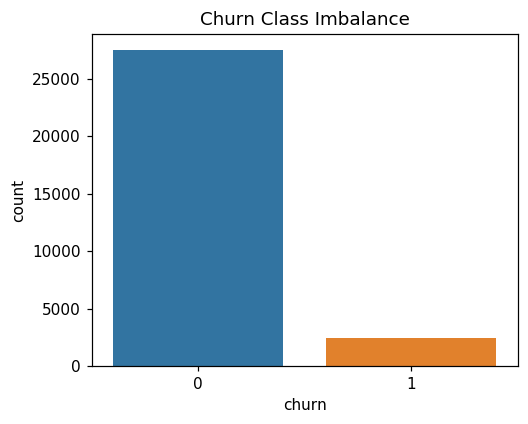

In [53]:
plt.figure(figsize=(5,4),dpi = 110)
plt.title("Churn Class Imbalance")
sns.countplot(data_hvc.churn)
plt.show()

- The churn count observed in the above count plot is very less.
- This also shows that the churn class is highly imbalanced.



**Creating variable "*categorical_column*" consisting of categorical features only.**

In [54]:
data_hvc.nunique().sort_values()

last_rech_8           2    
night_pck_user_8      2    
night_pck_user_7      2    
night_pck_user_6      2    
fb_user_8             2    
last_rech_7           2    
fb_user_6             2    
churn                 2    
fb_user_7             2    
last_rech_data_7      2    
last_rech_data_8      2    
last_rech_6           2    
last_rech_data_6      2    
monthly_2g_6          5    
monthly_2g_8          6    
monthly_2g_7          6    
monthly_3g_8          12   
monthly_3g_6          12   
monthly_3g_7          15   
count_rech_3g_6       25   
sachet_3g_6           25   
sachet_3g_7           27   
count_rech_3g_7       28   
count_rech_3g_8       29   
sachet_3g_8           29   
count_rech_2g_6       31   
sachet_2g_6           31   
count_rech_2g_8       34   
sachet_2g_8           34   
sachet_2g_7           35   
count_rech_2g_7       36   
total_rech_data_6     38   
total_rech_data_7     43   
total_rech_data_8     47   
max_rech_data_6       48   
max_rech_data_7     

In [55]:
categorical_columns = data_hvc.columns[data_hvc.nunique()==2]

In [56]:
categorical_columns = categorical_columns.drop("churn")

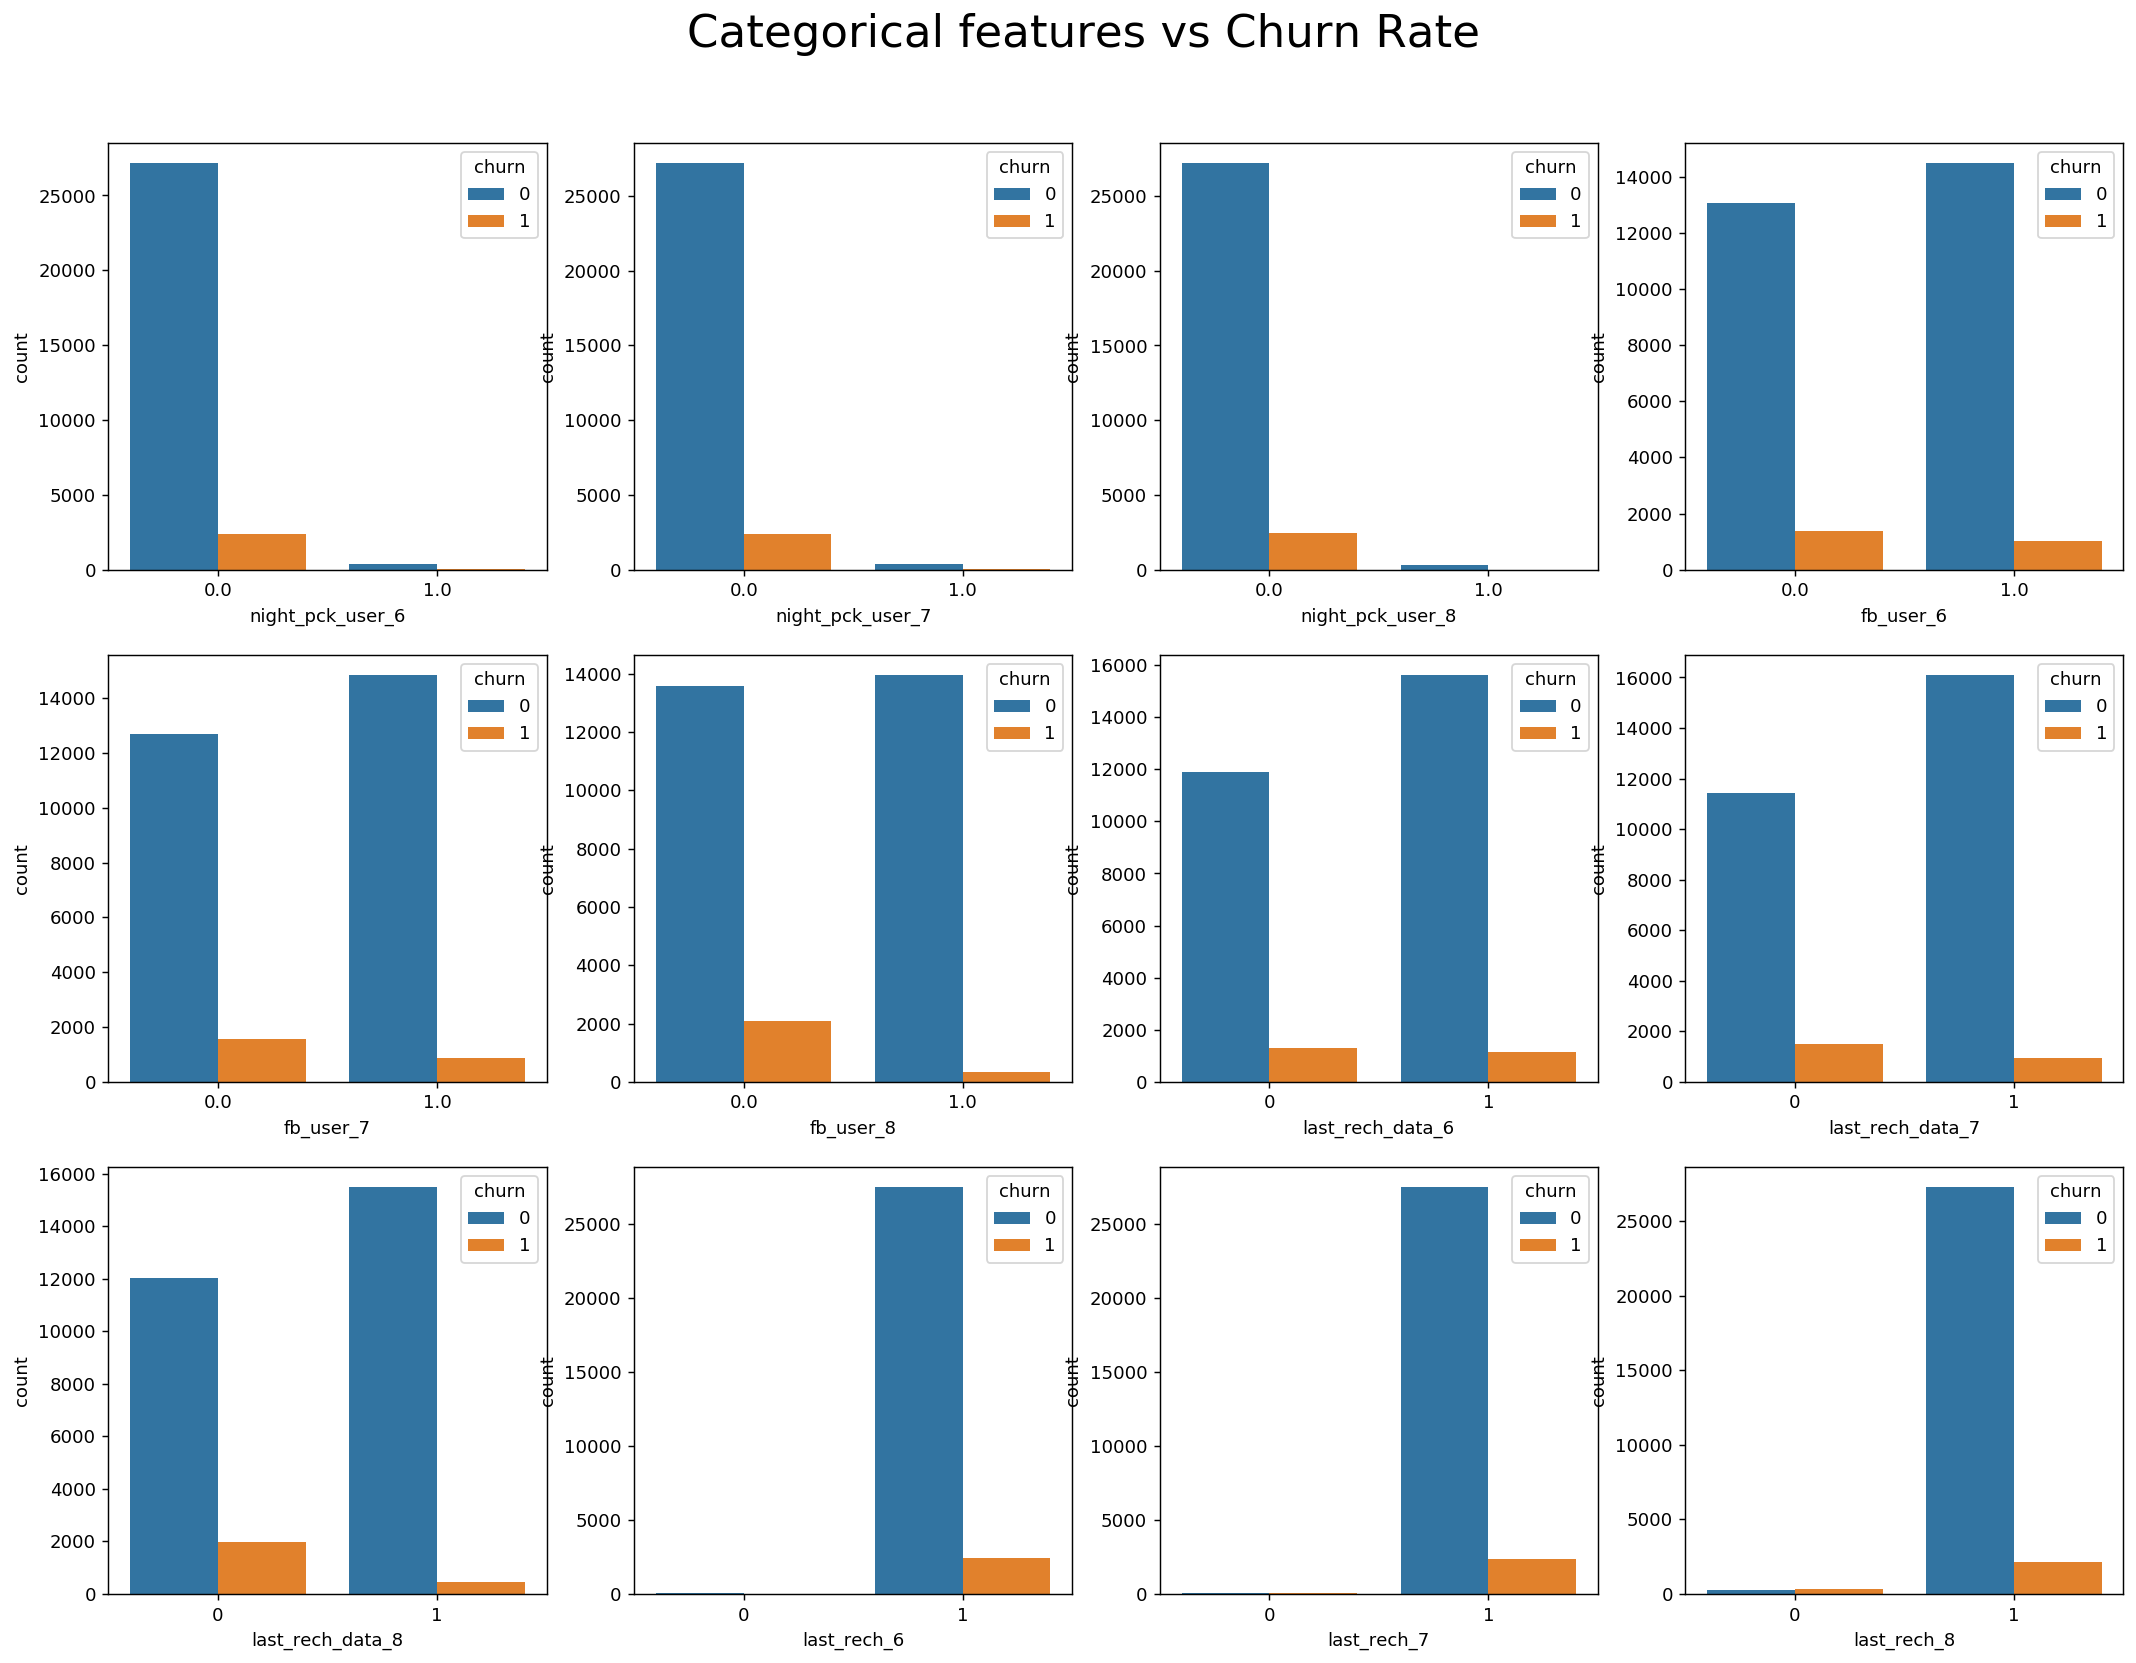

In [57]:
plt.figure(figsize=(20,20), dpi = 130)
plt.suptitle("Categorical features vs Churn Rate", fontsize = 25, y = .93)
for i,feature in enumerate(categorical_columns,start = 1):
    plt.subplot(4,4,i)
    sns.countplot(data= data_hvc, x= feature, hue="churn")
plt.show()



The above count plots shows that

1. The count of Customers not using night pack is very high therefore the churn rate is very low here.
2. Fb_users count is more than those not using and hence the churn rate of fb_users then those of not using is also quite less.
3. Those who recharge in * month donot tend to churn.







**Dropping the mobile number column since , no significant information is achieved from users mobile number.**

In [58]:
data_hvc.drop(columns = ["mobile_number","index"], inplace = True)

**Creating variable named "continuous_columns" consisting of all the columns with continuous variable**


In [59]:
continuous_columns = [col for col in data_hvc.columns if col not in categorical_columns]

**Looking for negatively correlated features**

In [60]:
data_hvc[continuous_columns].corr().churn

arpu_6                0.067672
arpu_7               -0.012397
arpu_8               -0.160612
onnet_mou_6           0.069677
onnet_mou_7           0.015350
onnet_mou_8          -0.078340
offnet_mou_6          0.060459
offnet_mou_7          0.002409
offnet_mou_8         -0.121284
roam_ic_mou_6         0.050295
roam_ic_mou_7         0.067961
roam_ic_mou_8         0.059204
roam_og_mou_6         0.064872
roam_og_mou_7         0.092864
roam_og_mou_8         0.067642
loc_og_t2t_mou_6     -0.032140
loc_og_t2t_mou_7     -0.050585
loc_og_t2t_mou_8     -0.081087
loc_og_t2m_mou_6     -0.059883
loc_og_t2m_mou_7     -0.091299
loc_og_t2m_mou_8     -0.152244
loc_og_t2f_mou_6     -0.036589
loc_og_t2f_mou_7     -0.046423
loc_og_t2f_mou_8     -0.069867
loc_og_t2c_mou_6     -0.000059
loc_og_t2c_mou_7      0.003756
loc_og_t2c_mou_8     -0.033363
loc_og_mou_6         -0.061164
loc_og_mou_7         -0.093876
loc_og_mou_8         -0.152392
std_og_t2t_mou_6      0.089884
std_og_t2t_mou_7      0.037631
std_og_t

In [61]:
top_neg_corr_features = data_hvc[continuous_columns].corr().churn.sort_values()[:15]

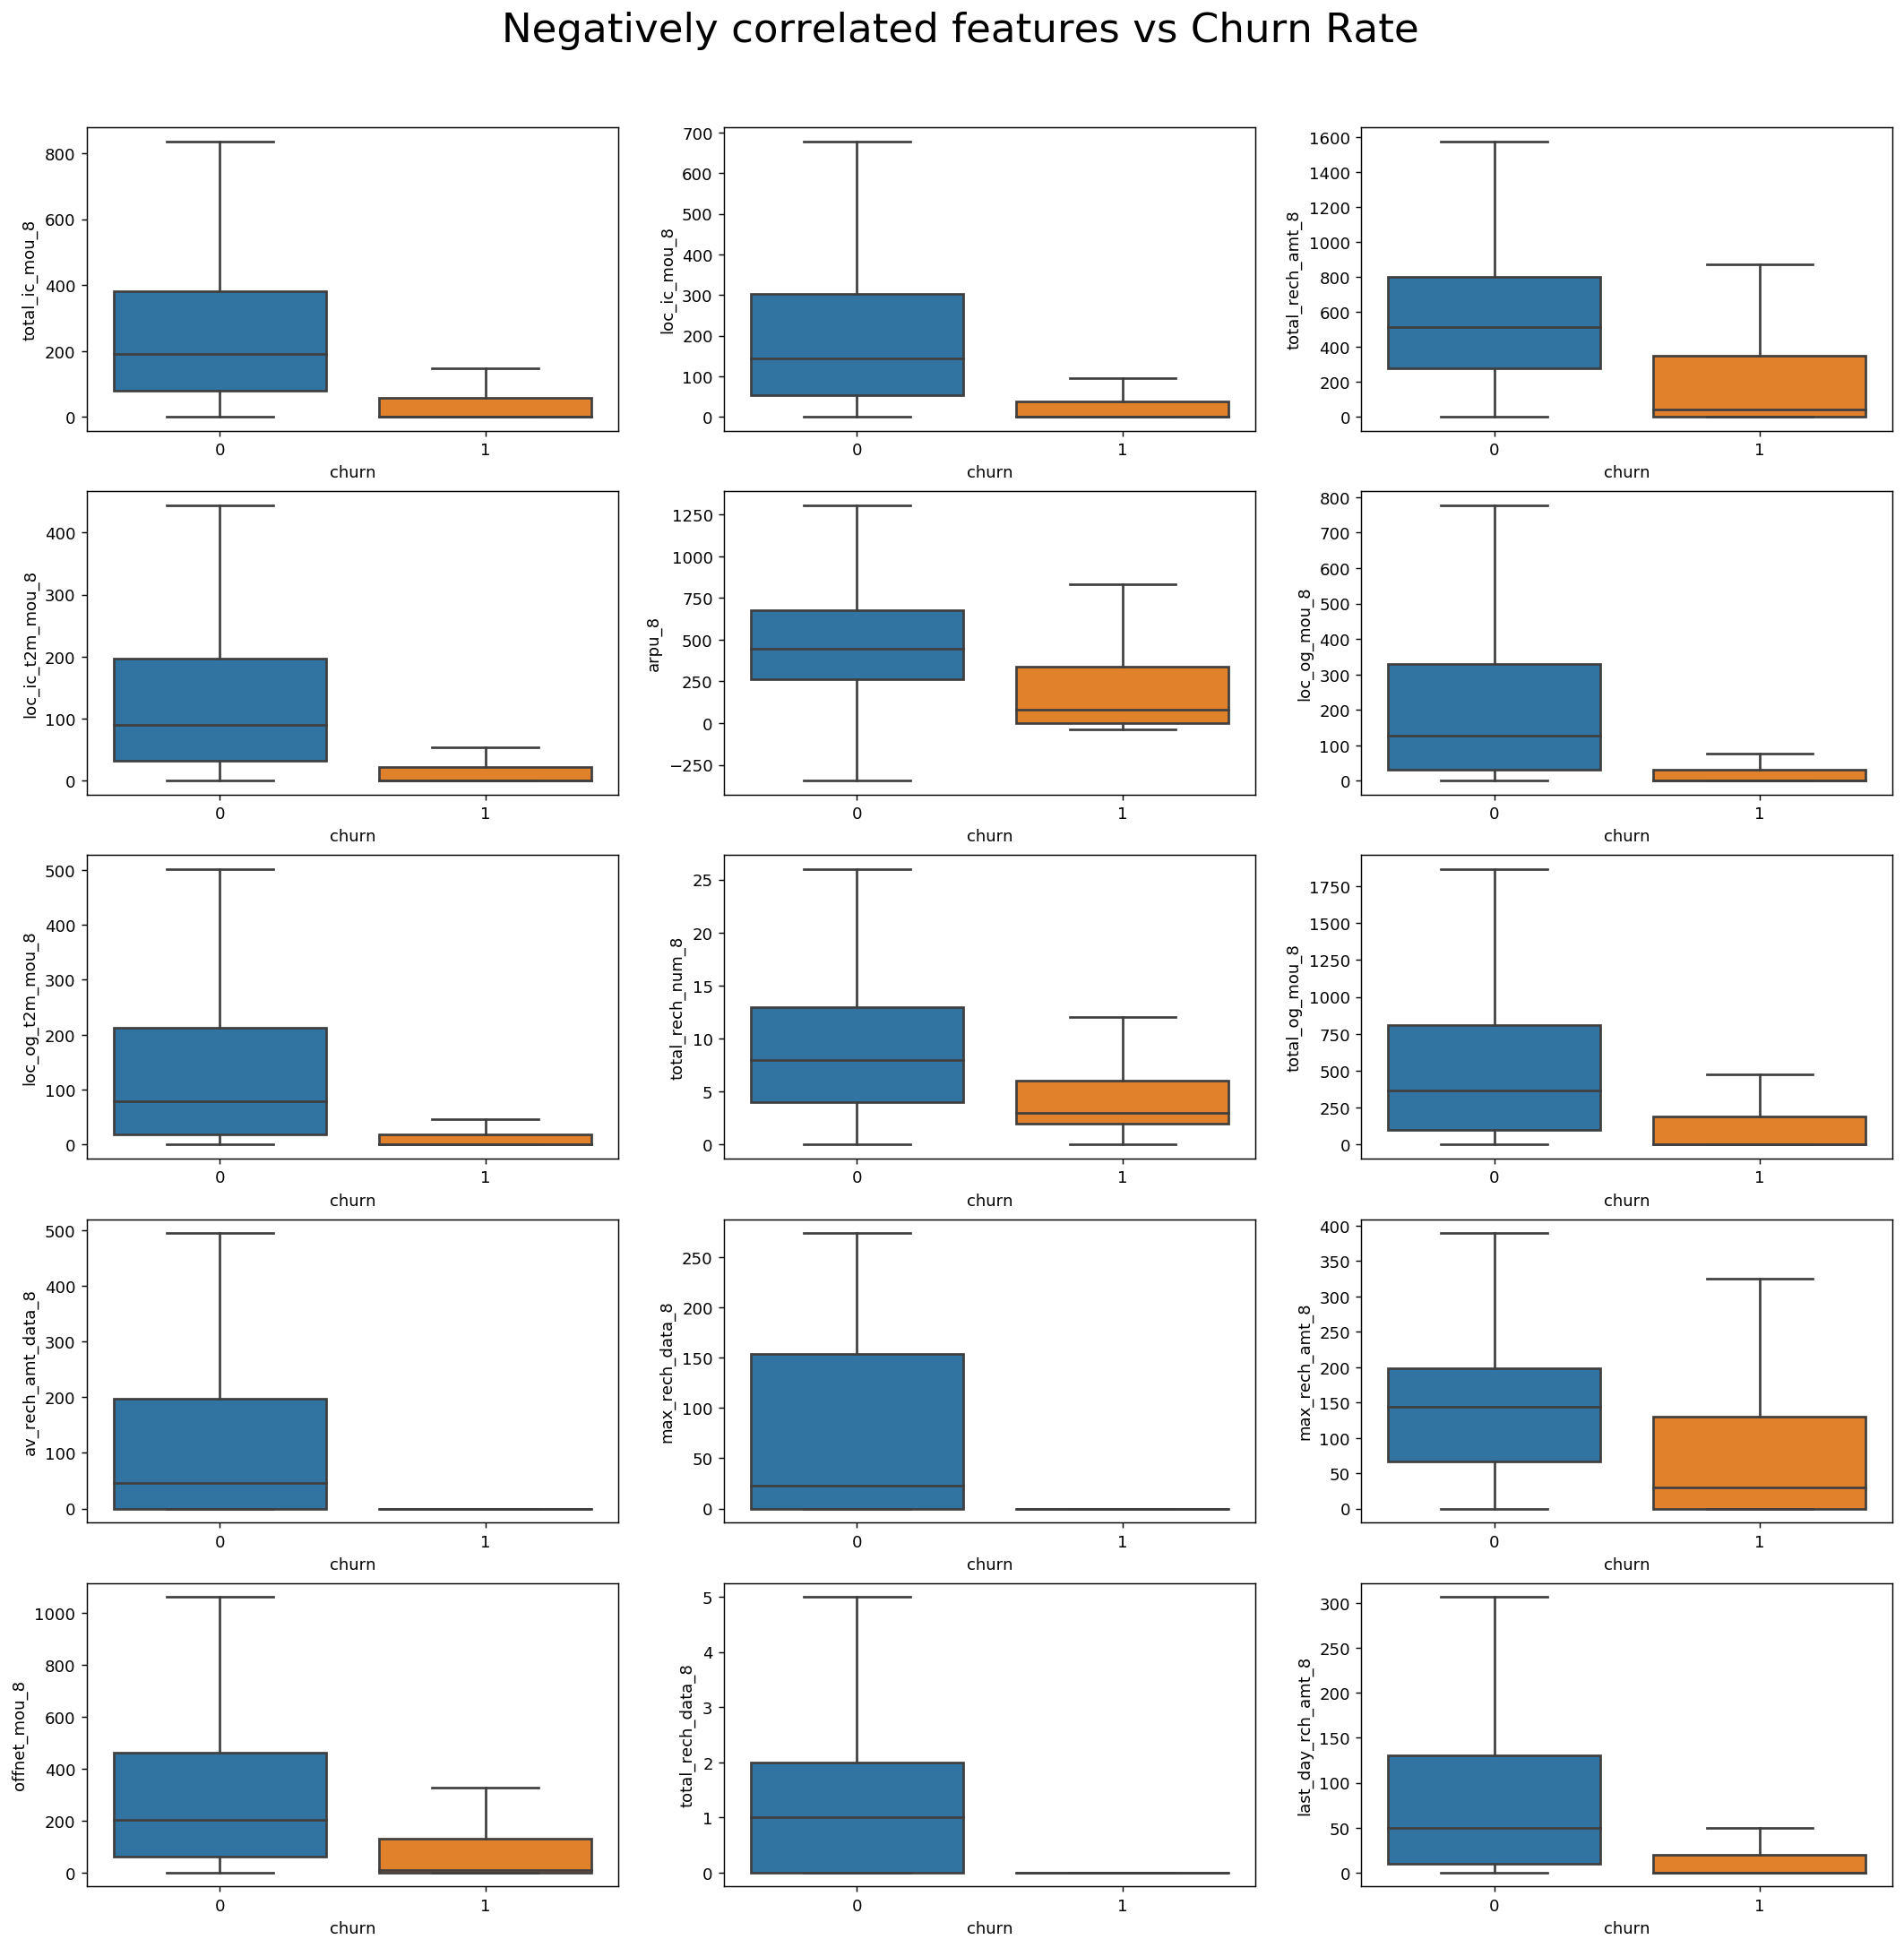

In [62]:
plt.figure(figsize=(20,20), dpi = 130)
plt.suptitle("Negatively correlated features vs Churn Rate", fontsize = 25, y = .93)
for i,feature in enumerate(top_neg_corr_features.index ,start = 1):
    plt.subplot(5,3,i)
    sns.boxplot(data= data_hvc, y= feature, x="churn", showfliers=False)
plt.show()

- The boxplot of negatively correlated show  that,there hes been a significant reduction in the mean of the churn customers in the month of august which is the action phase.

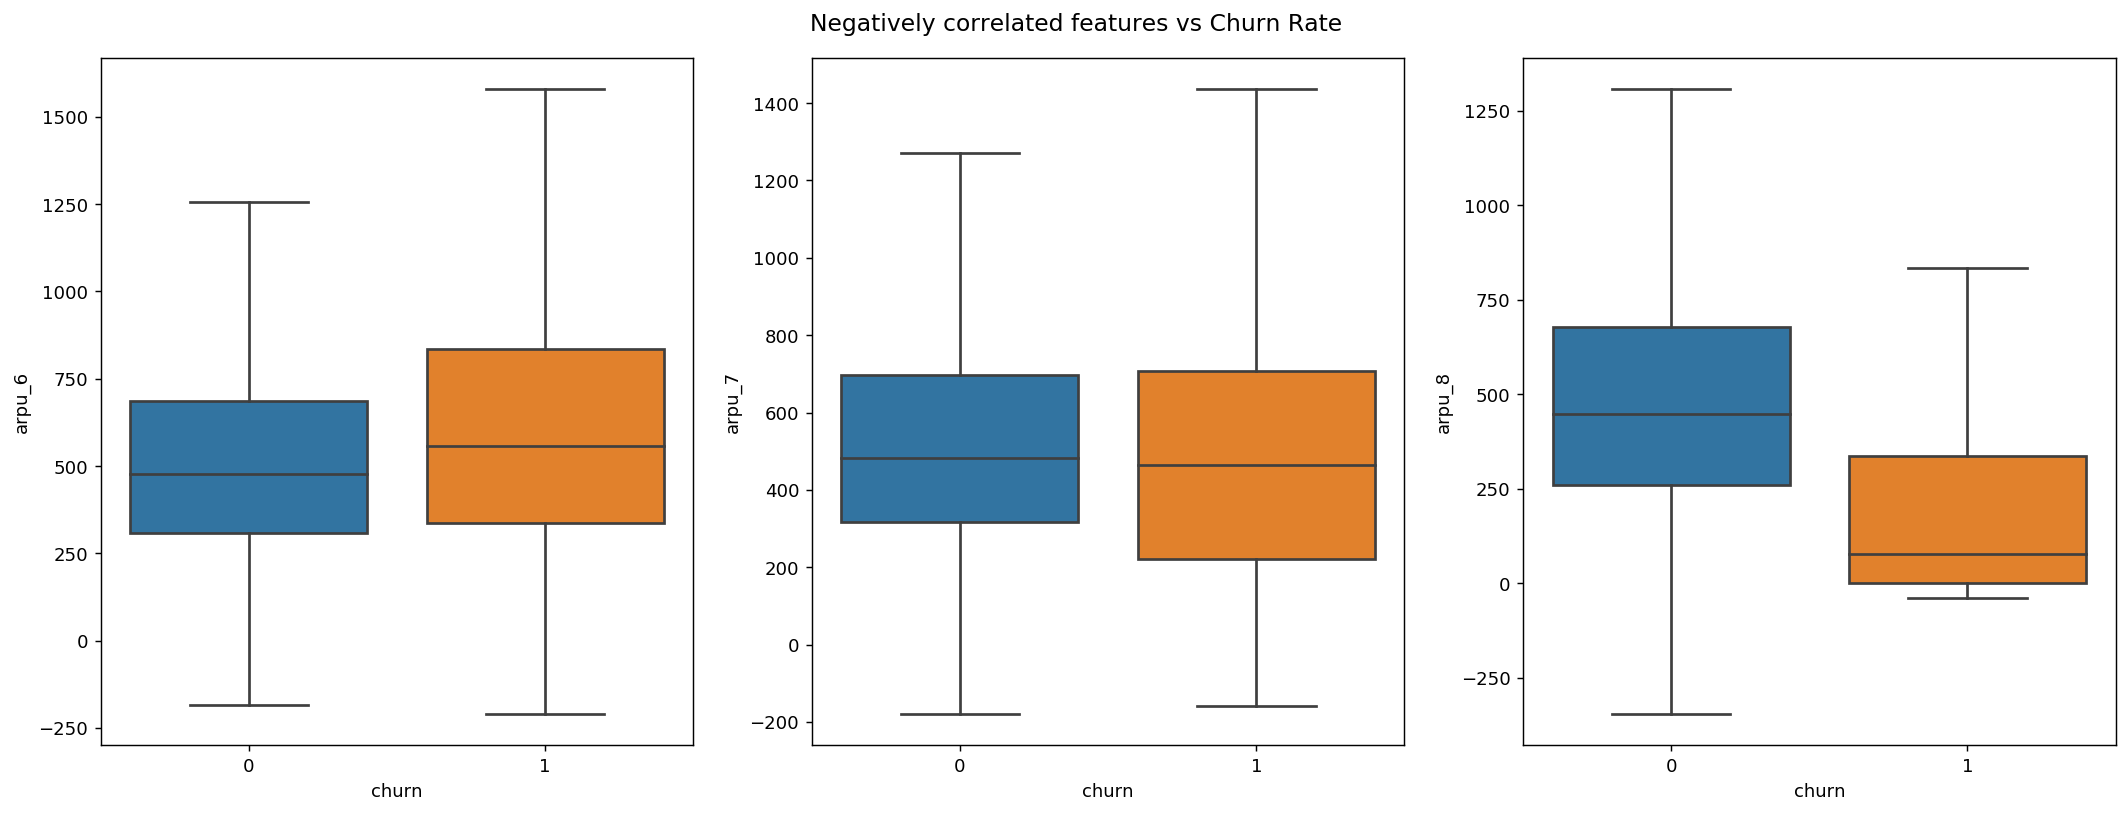

In [63]:
plt.figure(figsize=(20,7), dpi = 130)
plt.suptitle("Negatively correlated features vs Churn Rate", fontsize = 13, y = .93)
for i,feature in enumerate(["arpu_6","arpu_7","arpu_8"] ,start = 1):
    plt.subplot(1,3,i)
    sns.boxplot(data= data_hvc, y= feature, x="churn", showfliers=False)
plt.show()

- Considering the arpu_6 feature we observe that the mean for churn is reducing with the increasing month and at the 8th month i.e in the action month the churn has significantly reduced.

# **Data preparation for model building**

In [64]:
X = data_hvc.copy()
y = X.pop("churn")

###Handling imbalanced class
- We had observed that the churn data is very low as compared to not churn, which shows our class is highly imbalanced , therefore in order to take care of the same we make use of* SMOTE *technique.

### SMOTE


In [208]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [213]:
import imblearn
print(imblearn.__version__)

0.9.0


In [214]:


from imblearn.over_sampling import SMOTE

In [215]:
smote = SMOTE(random_state = 0)

In [216]:
X_balanced, y_balanced = smote.fit_resample(X,y)

In [217]:
pd.Series(y_balanced).value_counts()

1    27520
0    27520
Name: churn, dtype: int64

- The equal values above shows that the imbalanced data is handled well.

### Train-Test-Split

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train_balanced,X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced,y_balanced,test_size = 0.20, stratify = y_balanced,random_state = 100)

### Scaling

In [220]:
from sklearn.preprocessing import MinMaxScaler

In [221]:
scaler = MinMaxScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

### Dimensionality reduction using PCA

In [222]:
from sklearn.decomposition import PCA

In [223]:
pca = PCA(random_state=110)
pca.fit(X_train_balanced_scaled)
var_rat_cumsum = np.cumsum(pca.explained_variance_ratio_)

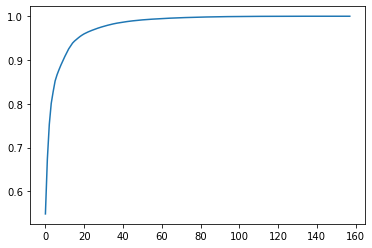

In [224]:
plt.plot(var_rat_cumsum)
plt.show()

- From above PCA plot is it been observed that after 15 the variance ratio seems to be flatten.

In [225]:
var_rat_cumsum[30-1]

0.9755068879803552

- By considering 30 PCAs we get 97% of accuracy so we can further go with these PCAs.

In [226]:
pca = PCA(30,random_state=110)
X_train_pca = pca.fit_transform(X_train_balanced_scaled)
X_test_pca = pca.transform(X_test_balanced_scaled)

In [227]:
cols  = ["PC"+str(i) for i in range(30)]
X_train_pca = pd.DataFrame(X_train_pca, columns = cols)
X_test_pca = pd.DataFrame(X_test_pca, columns = cols)

# **Model Building (I)** -using PCA
1. Random Forest
2. XG Boost
3. KNN- Clustering

###  Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [229]:
params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [2, 3, 4, 5, 6, 8, 10],
    'n_estimators': [100]
}

In [230]:
rfc = RandomForestClassifier()
gscv = GridSearchCV(estimator = rfc, cv= 5, param_grid = params,n_jobs = -1,scoring = 'recall')

In [ ]:
gscv.fit(X_train_pca,y_train_balanced)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
rfc_best = gscv.best_estimator_

y_test_predict = rfc_best.predict(X_test_pca)

print(classification_report(y_test_balanced,y_test_predict))
print("ROC AUC Score :",roc_auc_score(y_test_balanced,y_test_predict))

- **Random Forest model has**
1. Recall of 94%
2. ROC of 93%

###  XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier()
params = {'learning_rate': [0.1,0.2,0.3], 
            'subsample': [0.3,0.4,0.5]
}
gscv_xg = GridSearchCV(estimator = xgbc, cv= 5, param_grid = params,n_jobs = -1,scoring = 'recall')
gscv_xg.fit(X_train_pca,y_train_balanced)

In [ ]:
gscv_xg.best_score_

In [ ]:
xgbc_best = gscv_xg.best_estimator_

In [ ]:
y_test_predict = xgbc_best.predict(X_test_pca)
print(classification_report(y_test_balanced,y_test_predict))
print("ROC AUC Score :",roc_auc_score(y_test_balanced,y_test_predict))

 - **XG Boost model has**
1. Best Score of 88%
2. Recall of 88%
3. ROC of 89%
- learning Rate = 0.3 , Subsample = o.5


### K-Nearest Neighbor(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10]}
knn = KNeighborsClassifier()
gscv_knn = GridSearchCV(estimator = knn, cv= 5, param_grid = params,n_jobs = -1,scoring = 'recall')
gscv_knn.fit(X_train_pca,y_train_balanced)

In [ ]:
gscv_knn.best_score_

In [ ]:
knn_best = gscv_knn.best_estimator_

In [ ]:

y_test_predict = knn_best.predict(X_test_pca)
print(classification_report(y_test_balanced,y_test_predict))
print("ROC AUC Score :",roc_auc_score(y_test_balanced,y_test_predict))

- **KNN model has**
1. Best score of 97%
2. Recall of 98%
3. ROC of 93%

- From all the above three K-Nearest Neighbor model stands out and is hence considered to be the best model .

#  **Model Building(II)** -Indentifying Important features

### Random Forest Classifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(X_train_balanced_scaled, y_train_balanced)

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": classifier_rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

### Top 15 Important features

In [ ]:
Imp_feats = imp_df.sort_values(by="Imp", ascending=False)[:15]
Imp_feats

- Above are the top 15 features that influence the churn.

# **Actionable recommendations**

In order to prevent customers from churning in the actionable phase following strategies are recommended.


1. The company can provide offers on recharge  for the month of august ,as the recharge amount has decreased in this month than the last two.

2. Customers using Service scheme to avail services of Facebook and similar social networking sites tend to churn less , and those who are not using tend to churn more , also the count of customers not using  these services are more in the action month, therefore company can offer these services with some less price for data  as compared to last 2 months or advanced network like 4G network to prevent customers from churning.

Consider the above factors to identify the customers who are most likely to churn , 
recommendations for some common problems :
1. **Network** : The company can work on improving network infrastructure.
2. **Affordability** : The company can provide offers on some of the popular packs or create new affordable packs .
3. **Service** : The company can try to get the feedback from the customers and improve its service  strategies accordingly.





 